In [27]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')  # Change the number of units to match the number of classes (10 for MNIST)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change loss function
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1550 - accuracy: 0.9531 - val_loss: 0.0529 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0427 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0399 - val_accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0302 - val_accuracy: 0.9898


In [34]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 10)              

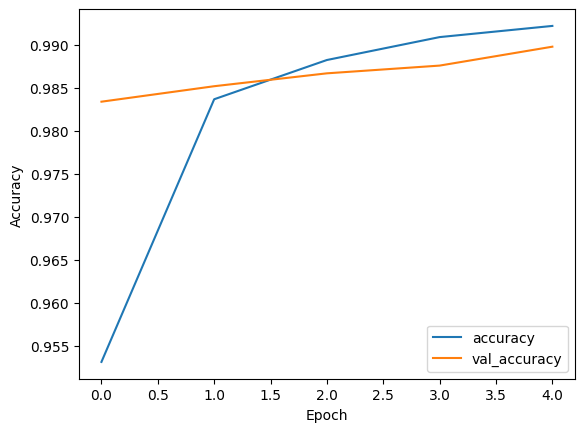

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


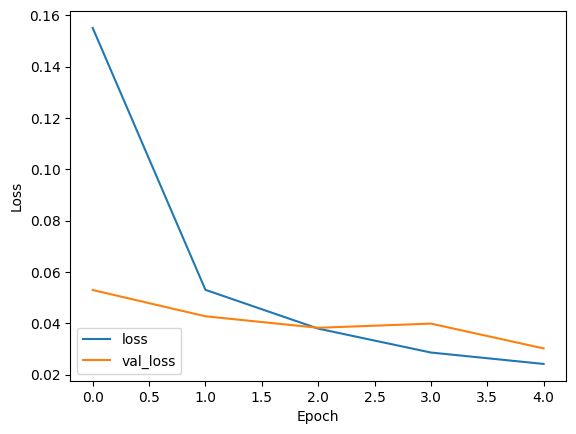

In [33]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()

In [35]:
model.evaluate(test_images, test_labels, verbose=2)



313/313 - 3s - loss: 0.0302 - accuracy: 0.9898 - 3s/epoch - 8ms/step


[0.030194539576768875, 0.989799976348877]